# Ciência de Dados - Projeto 3

## Análise de previsão de doenças cardiovasculares

**Alunas: Gabriela Mitu, Gabriella Cukier, Alexandre Cury**

________

## Introdução

Segundo a organização Pan-Americana da Saúde, doenças cardiovasculares são a principal causa de morte no mundo. Mais de 17 milhões de pessoas morreram por causa delas em 2015, o que representa 31% de todas as mortes em nível global.

A causa de doenças cardiovasculares envolve uma série de variáveis, como arritmias, insuficiência venosa, cardiopatia congênita, entre outras.

Visto a gravidade de tal questão, a previsão de doenças cardiovasculares é considerada um dos mais importantes assuntos na seção de análise de dados clínicos. Desta forma, a mineração de dados transforma a grande coleção de dados brutos de assistência médica em informações que podem auxiliar na tomada de decisões.

Portanto, com o objetivo de apoiar este estudo, foi escolhido este tema de análise de doenças cardiovasculares para o Projeto 3 de Ciência de Dados com a uso de ferramentas como o python para desenvolver um Machine Learning através de um DataSet do repositório da UCI.

O método utilizado será o de aprendizado supervisionado com o intuito de prever um rótulo (se alguém terá ou não a doença  cardíaca).
Para atingir esse objetivo, foram selecionados alguns atributos a serem analisados, contidos nas colunas do dataset.  Eles estão relacionados com exames de pacientes. É importante ressaltar que apenas um destes fatores isolados não é suficiente para o surgimento de uma doença, porém a combinação de alguns pode ser determinante.


•	Idade


•	Sexo


•	Presença de dores no peito


•	Pressão sanguínea em repouso


•	Colesterol


•	Glicemia (Quando maior que 120mg/dl: 1=True, caso contrário: 0=False)



•	Medida do eletrocardiograma em repouso


•	Frequência cardíaca máxima 


•	Dores no peito temporárias causadas por exercícios


•	Anormalidades vistas no eletrocardiograma em período de exercícios



•	Supranivelamento do segmento ST



•	Número de principais vasos sanguíneos  coloridos no exame de fluoroscopia


•	Produção anormal de hemoglobina



Além disso, o dataset contém a coluna de presença de doenças cardíacas, que será importante para ensinar o classificador.


____
## Mecanismo

A realização do projeto contará com o recurso de Regressão Logística, já frequentemente utilizado nas ciência biológicas, assim como no estudo de doenças cardiovasculares para estudar variáveis independentes. A regressão logística faz predições para lidar com problemas que exigem uma estimativa de probabilidade e tem como "output" - discreto - zero ou um (0/1), além de ser utilizada para calcular a possibilidade de certo evento ocorrer.

Na regressão logística, a probabilidade de ocorrência de um evento pode ser estimada diretamente. Considerando que só há dois "outputs" (0/1) e "p" variáveis independentes, chega-se em:

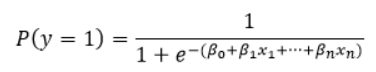

Os coeficiente B0, B1,..., são selecionados de forma que maximize a probabilidade da amostra ter sido observada.

Assim, o gráfico de uma regressão logística fica neste formato:

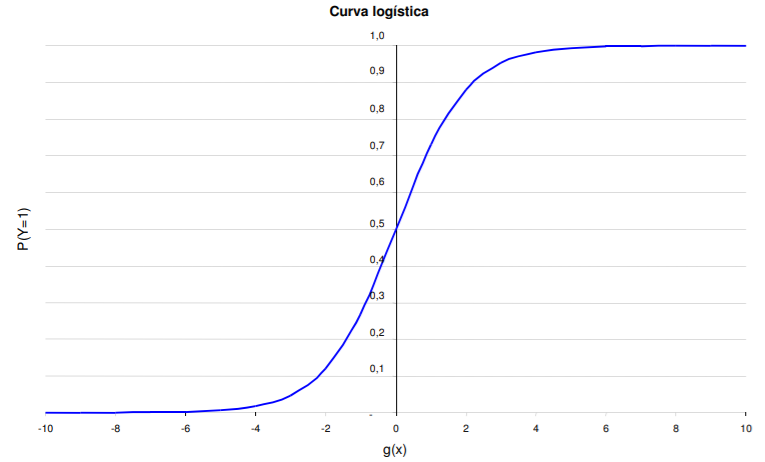

Observa-se ainda que:
- Quando g(x) tende a infinito, P(Y=1) tende a 1
- Quando g(x) tende a menos infinito, P(Y=1) tende a 0

## Uso de Confusion Matrix

Uma ferramenta que será essencial para o projeto é a Confusion Matrix, que é como um preditor de desempenho do modelo em um problema de classificação, ou seja, um npumero de previsões corretas e incorretas é resumida com valores de contagem e repartidos por cada classe. Portanto, ela auxiliará na mensuração do desempenho do modelo - "Accuracy Report".

________
# Import  das libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
dados=pd.read_csv("heart.csv")

_______
## Adaptação do idioma do DataSet 

In [39]:
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Como é possível ver, há um total de 14 colunas, cada uma equivalente a uma variável independente e que será estudada minunciosamente para o desenvolvimento do machine learning e identificar aqueles que apresentam doença cardíaca ou não apresentam.

____
## Análise dos dados

Para se ter uma melhor noção da composição do DataSet escolhido, será plotado um gráfico com a frequência daqueles que sofrem de alguma doença cardiovascular - quer será representado como target: 1 - e daqueles que não sofrem da doença - target: 0.

## Separação das variáveis

O dataset escolhido contém tanto variáveis qualitativas quanto quantitativa, que demandam abordagens anaíticas distintas Portanto, foram separadas para sua análise

In [41]:
var_num=['idade','pressao','freq_card_max','efeito_exercicio','colesterol']
var_cat=[x for x in dados.columns if x not in var_num]

# Análise exploratória

## Target 

In [46]:
target=(dados.diagnostico.value_counts())
target

1    165
0    138
Name: diagnostico, dtype: int64

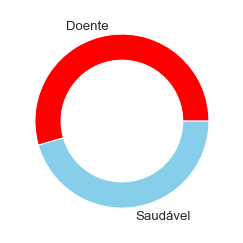

In [56]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(target, labels=('Doente','Saudável'), colors=['red','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

A partir do gráfico e codificação nas células anteriores, é possível observar que a frequência de ambos os grupos está visualmente equilibrada, o que será importante para o desenvolvimento do machine learning

## Variáveis quantitativas

In [57]:
dados[var_num].describe()

,idade,pressao,freq_card_max,efeito_exercicio,colesterol
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,149.646865,1.039604,246.264026
std,9.082101,17.538143,22.905161,1.161075,51.830751
min,29.000000,94.000000,71.000000,0.000000,126.000000
25%,47.500000,120.000000,133.500000,0.000000,211.000000
50%,55.000000,130.000000,153.000000,0.800000,240.000000
75%,61.000000,140.000000,166.000000,1.600000,274.500000
max,77.000000,200.000000,202.000000,6.200000,564.000000


In [58]:
corrdados=dados[var_num].corr()

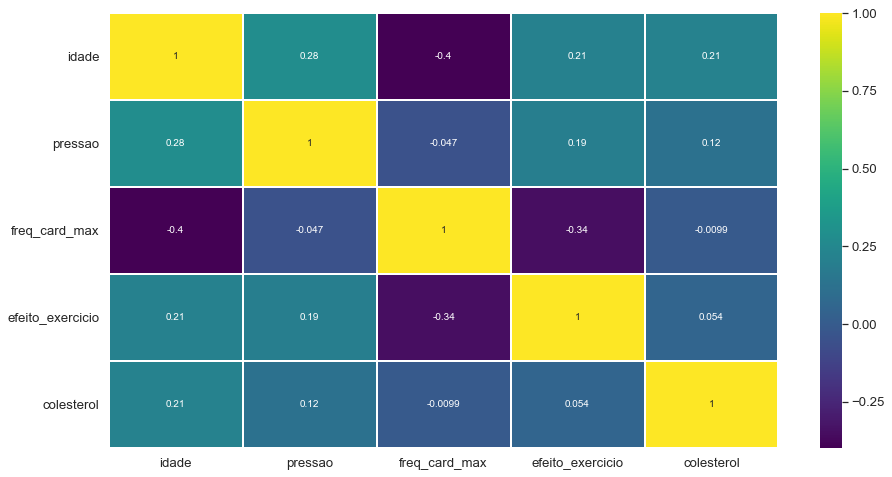

In [59]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(corrdados, annot = True, cmap='viridis', linecolor='white',  linewidths=1)
plt.show()

# plot using a color palette
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
 
#add this after your favorite color to show the plot
#sns.plt.show()

In [60]:
var_num=['idade','pressao','freq_card_max','efeito_exercicio','colesterol']
var_cat=[x for x in dados.columns if x not in var_num]

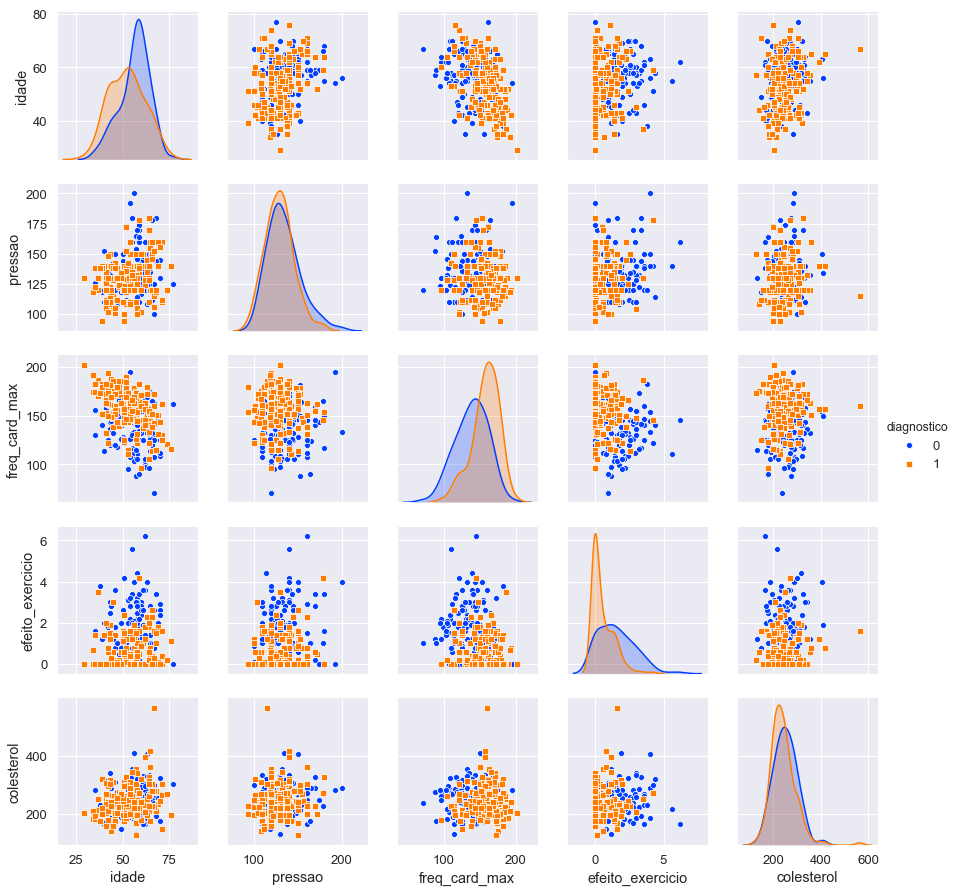

In [61]:
sns.pairplot(dados, hue = 'diagnostico', markers=["o", "s"], vars = [v for v in var_num], palette = sns.color_palette("bright", 10))

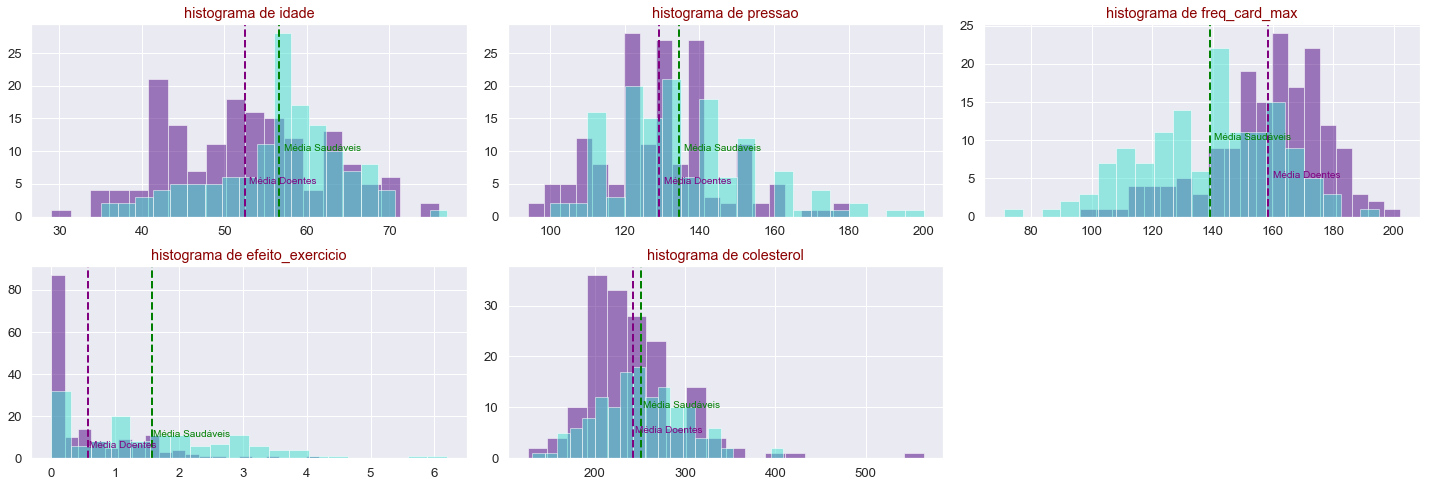

In [62]:
doente=dados[dados['diagnostico']==1]
saudavel=dados[dados['diagnostico']==0]


def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)    


def draw_histograms(dataframe, dataframe2, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        plot1=dataframe[feature].hist(bins=20,ax=ax,color='indigo', alpha=0.5, label='Doente')
        plot2=dataframe2[feature].hist(bins=20,ax=ax,color='turquoise', alpha=0.5, label='Saudável')
        verticalLine(plot1, dataframe[feature].mean(), 5, "purple", "Média Doentes")
        verticalLine(plot2, dataframe2[feature].mean(), 10, "green", "Média Saudáveis")

        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(doente[var_num],saudavel[var_num],saudavel[var_num].columns,6,3)

In [63]:
d=doente[var_num].mean()

In [64]:
s=saudavel[var_num].mean()

In [65]:
from pandas import DataFrame
df = DataFrame((d), columns= ['Doente'])
df2 = DataFrame((s), columns= ['Saudável'])

df = df.join(df2, how='inner', lsuffix=' ', rsuffix=' ')
df
sns.set(font_scale=1.2)


#sns.heatmap(df, annot=True,cmap="YlGnBu")
df

,Doente,Saudável
idade,52.496970,56.601449
pressao,129.303030,134.398551
freq_card_max,158.466667,139.101449
efeito_exercicio,0.583030,1.585507
colesterol,242.230303,251.086957


## Variáveis qualitativas

In [66]:
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
def categ(x):
    dados[x] = dados[x].astype('category')

categ('sexo')

dados.sexo.cat.categories = ({ 0:'Mulher', 1:'Homem'})
categ('dores_peito')
dados.dores_peito.cat.categories = ({1:'Angina normal', 2:'Angina anormal', 3:'Dor não anginosa', 4:'Assintomático'})
categ('glicemia')
dados.glicemia.cat.categories = ({0:'<=120mg/dl', 1:'>120mg/dl'})
categ('eletrocar_repouso')
dados.eletrocar_repouso.cat.categories = ({0:'Normal', 1:'Problema', 2:'Hipertrofia'})#################
categ('angina_exercicio')
dados.angina_exercicio.cat.categories = ({0:'Não', 1:'Sim'})
categ('eletrocar_exercicio')
dados.eletrocar_exercicio.cat.categories = ({1:'Crescente', 2:'Constante', 3:'Decrescente'})
#categ('vasos') -> Já contém o número de vasos coloridos no exame
#categ('hemoglobina')
#dados.hemoglobina.cat.categories = ('Mulher', 'Homem')
categ('diagnostico')
dados.diagnostico.cat.categories = ({0:'Não tem', 1:'Tem'})


Tabela Cruzada por total de COLUNAS (em %):


Text(0, 0.5, 'Frequência Relativa (em %)')

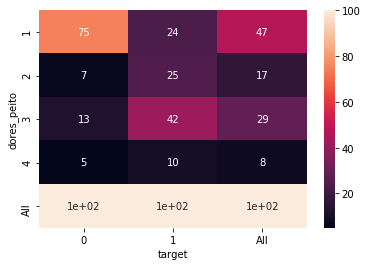

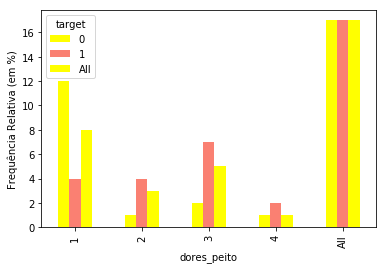

In [20]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.dores_peito,dados.diagnostico,margins=True,rownames=['dores_peito'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True)

ct2=ct3
ct2 = (ct2/ct2.sum().sum()*100).round(decimals=0)
ct2.plot(kind='bar', color=('yellow', 'salmon'))
plt.ylabel('Frequência Relativa (em %)')

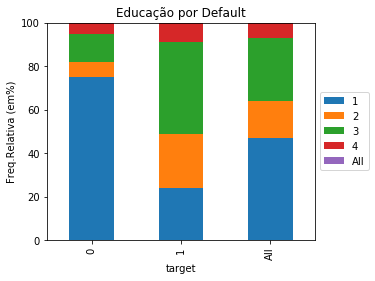

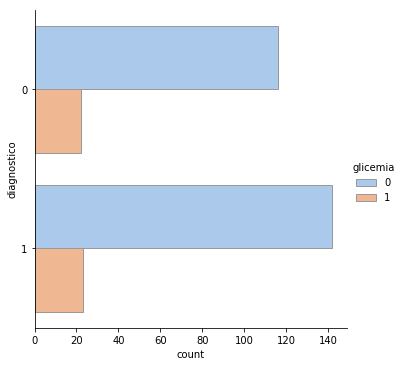

In [21]:
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



sns.catplot(y="diagnostico", hue="glicemia", kind="count",
            palette="pastel", edgecolor=".6",
            data=dados);

Tabela Cruzada por total de COLUNAS (em %):


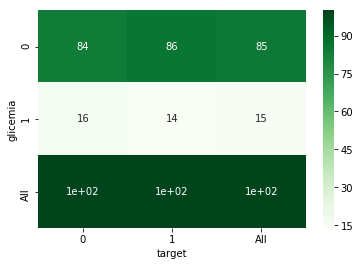

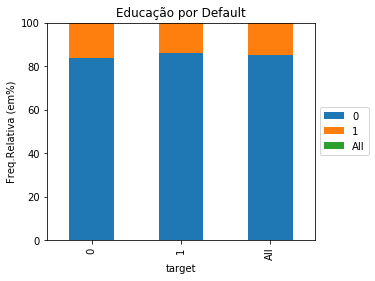

In [22]:
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.glicemia,dados.diagnostico,margins=True,rownames=['glicemia'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True,  cmap="Greens")
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Tabela Cruzada por total de COLUNAS (em %):


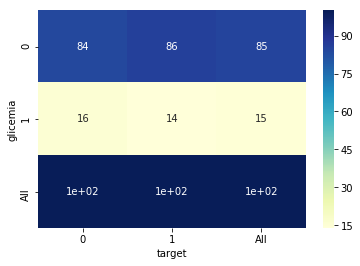

In [23]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.glicemia,dados.diagnostico,margins=True,rownames=['glicemia'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True, cmap="YlGnBu")


Tabela Cruzada por total de COLUNAS (em %):


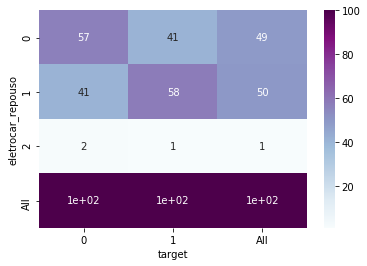

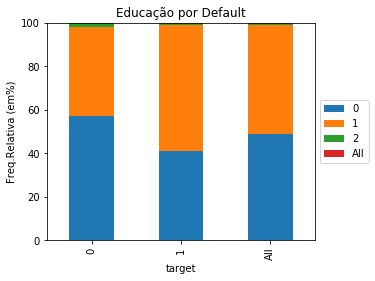

In [24]:


print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.eletrocar_repouso,dados.diagnostico,margins=True,rownames=['eletrocar_repouso'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True,  cmap="BuPu")
ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Tabela Cruzada por total de COLUNAS (em %):


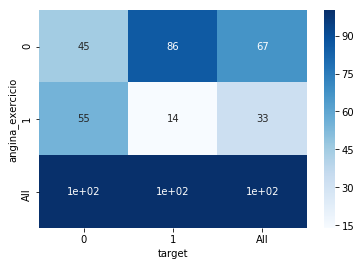

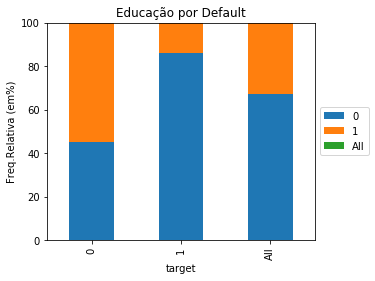

In [25]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.angina_exercicio,dados.diagnostico,margins=True,rownames=['angina_exercicio'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True, cmap="Blues")

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Tabela Cruzada por total de COLUNAS (em %):


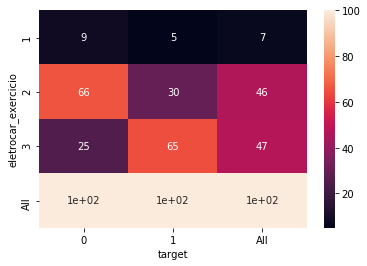

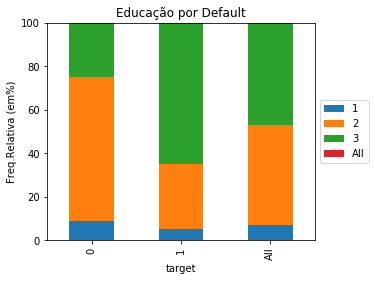

In [26]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.eletrocar_exercicio,dados.diagnostico,margins=True,rownames=['eletrocar_exercicio'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True)

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Tabela Cruzada por total de COLUNAS (em %):


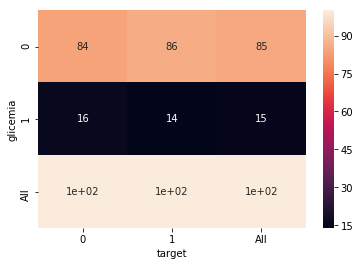

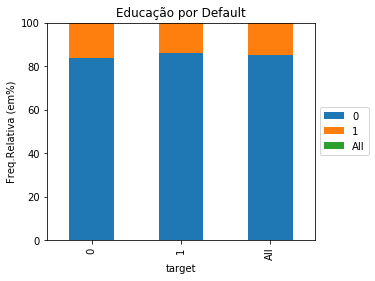

In [27]:

print('Tabela Cruzada por total de COLUNAS (em %):')
#Use axis igual a 0
ct3=pd.crosstab(dados.glicemia,dados.diagnostico,margins=True,rownames=['glicemia'], colnames=['target']).apply(percConvert, axis=0)
sns.heatmap(ct3, annot=True)

ct3 = ct3.iloc[0:5,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Educação por Default')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [28]:
dados.isnull().sum()


idade                  0
sexo                   0
dores_peito            0
pressao                0
colesterol             0
glicemia               0
eletrocar_repouso      0
freq_card_max          0
angina_exercicio       0
efeito_exercicio       0
eletrocar_exercicio    0
vasos                  0
hemoglobina            0
diagnostico            0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

In [30]:
print ("Quantidade treinamento dos atributos: " + str(X_train.shape))
print ("Quantidade treinamento do target: " + str(y_train.shape))
print ("Quantidade teste dos atributos: " + str(X_test.shape))
print ("Quantidade teste do target: " + str(y_test.shape))

Quantidade treinamento dos atributos: (203, 13)
Quantidade treinamento do target: (203,)
Quantidade teste dos atributos: (100, 13)
Quantidade teste do target: (100,)


In [31]:
conta_treinamento = pd.Series(y_train).value_counts()
conta_treinamento


1    107
0     96
Name: diagnostico, dtype: int64

In [32]:
conta_teste = pd.Series(y_test).value_counts()
conta_teste

1    58
0    42
Name: diagnostico, dtype: int64

In [33]:
conta_treinamento[True] / conta_treinamento[False]

0.897196261682243

In [34]:
conta_teste[True] / conta_teste[False]


0.7241379310344828

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs', multi_class='auto')


In [36]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.8


In [38]:
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,4,145,233,1,0,150,0,2.3,1,0,1,1
1,37,1,3,130,250,0,1,187,0,3.5,1,0,2,1
2,41,0,2,130,204,0,0,172,0,1.4,3,0,2,1
3,56,1,2,120,236,0,1,178,0,0.8,3,0,2,1
4,57,0,1,120,354,0,1,163,1,0.6,3,0,2,1


In [39]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

TypeError: '<' not supported between instances of 'CategoricalDtype' and 'CategoricalDtype'

In [40]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [43]:
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

TypeError: object of type 'CategoricalDtype' has no len()

In [42]:
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=110, random_state=2606)

TypeError: object of type 'CategoricalDtype' has no len()

In [77]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(y_test, y_pred)))

Acurácia: 0.83


In [78]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

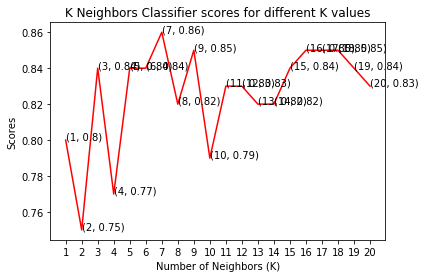

In [79]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [81]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[6]*100, 7))


The score for K Neighbors Classifier is 86.0% with 7 nieghbors.


In [88]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 83.25%
Test accuracy: 83.00%


In [83]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 93.10%
Test accuracy: 82.00%


In [84]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

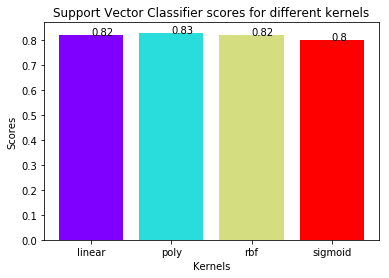

In [85]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [86]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

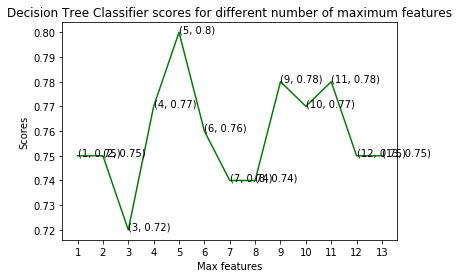

In [87]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [89]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(max_depth=6, random_state=2606), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=110, random_state=2606)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)
    
    
    
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.84
Decision Trees,0.75
Logistic Regression,0.81
Naive Bayes,0.83
SVM,0.81
Random Forests,0.83


__________________
## Referências

https://www.paho.org/bra/index.php?option=com_content&view=article&id=5253:doencas-cardiovasculares&Itemid=1096